In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
from ntupleanalysis import *
import math

In [7]:
plot_setup()

In [13]:
zmumu = uproot.open("/data0/bpnachman/ZjetOmnifold_Oct5_PowhegPythia_mc16e.root")['EventTree']

In [14]:
zmumu.show()

CutFlow                    (no streamer)              asdtype('>i4')
EventNumber                (no streamer)              asdtype('>i4')
RunNumber                  (no streamer)              asdtype('>i4')
LumiBlock                  (no streamer)              asdtype('>i4')
BCID                       (no streamer)              asdtype('>i4')
NPV                        (no streamer)              asdtype('>i4')
pass                       (no streamer)              asdtype('>i4')
truth_pass                 (no streamer)              asdtype('>i4')
initialWeight              (no streamer)              asdtype('>f4')
pileupWeight               (no streamer)              asdtype('>f4')
genWeight                  (no streamer)              asdtype('>f4')
weight                     (no streamer)              asdtype('>f4')
mu_recoSF                  (no streamer)              asdtype('>f4')
mu_isoSF                   (no streamer)              asdtype('>f4')
mu_TTVASF                  (no str

In [16]:
mybranches = []
for mykey in zmumu.keys():
    mybranches+=[mykey.decode("utf-8")]

In [26]:
Events = prepare_dataset_table(["/data0/bpnachman/ZjetOmnifold_Oct5_PowhegPythia_mc16e.root"], 
        "EventTree", branch_list=mybranches, col_names=mybranches, entrysteps=10000, outputype=Event_table)

Total number of events:  666677
Events in returned Object:  666677
Loading the data took  151.20388555526733  seconds


In [65]:
#Event selection

#we should eventually properly account for events that fail one of Gen or Sim.  For now, just ignore them.

mypass = (Events.events['m_ll']>0)&(Events.events['m_ll']<200)&(Events.events['truth_m_ll']>0)&(Events.events['truth_m_ll']<200)

(0, 605905.5)

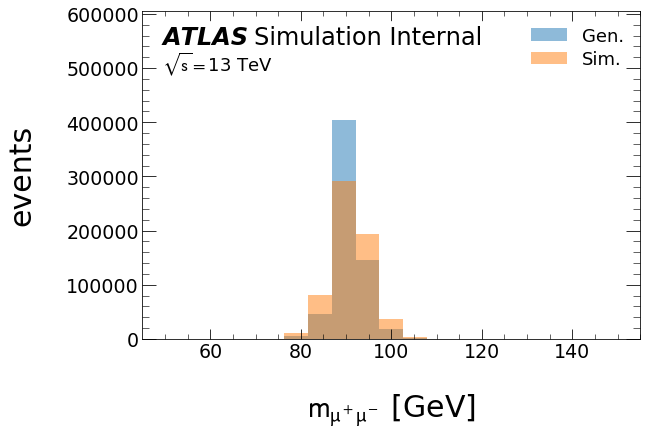

In [76]:
hG,_,_=plt.hist(Events.events['truth_m_ll'][mypass],label="Gen.",bins=np.linspace(65,1105,20),alpha=0.5)
hS,_,_=plt.hist(Events.events['m_ll'][mypass],label="Sim.",bins=np.linspace(50,150,20),alpha=0.5)
plt.xlabel("$m_{\mu^+\mu^-}$ [GeV]")
plt.ylabel("events")
draw_atlas_text(lines=[r'$\sqrt{s} = $13 TeV'])
plt.legend()
plt.ylim([0,1.5*max(max(hG),max(hS))])

In [68]:
mytracks = Events.events['truth_pT_Tracks'][mypass]
ntrack_Gen = [len(mytracks[i]) for i in range(len(mytracks))]

In [69]:
mytracks = Events.events['pT_Tracks'][mypass]
ntrack_Sim = [len(mytracks[i]) for i in range(len(mytracks))]

(0, 163362.0)

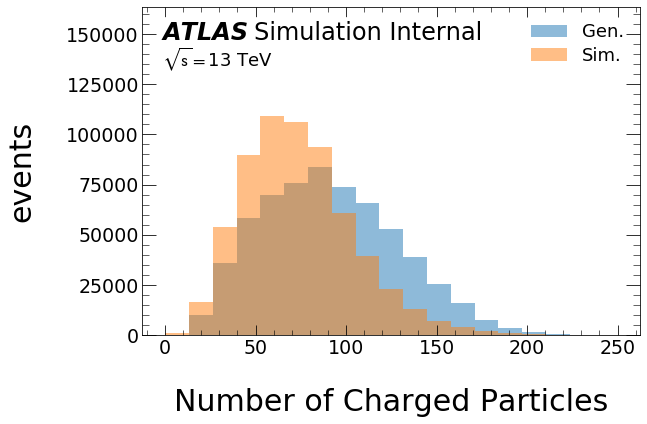

In [75]:
hG,_,_=plt.hist(ntrack_Gen,label="Gen.",alpha=0.5,bins=np.linspace(0,250,20))
hS,_,_=plt.hist(ntrack_Sim,label="Sim.",alpha=0.5,bins=np.linspace(0,250,20))
plt.xlabel("Number of Charged Particles")
draw_atlas_text(lines=[r'$\sqrt{s} = $13 TeV'])
plt.ylabel("events")
plt.legend()
plt.ylim([0,1.5*max(max(hG),max(hS))])